In [1]:
import sys
sys.path.append(r'C:\Users\Rony\python_codes\confocal_codes\pyrtrack')
import numpy as np
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt
from skimage import io
from pyrtrack.finders import MultiscaleBlobFinder, get_deconv_kernel, deconvolve
from pyrtrack import rescale
%matplotlib inline

Quick functions

In [2]:
def draw_circles(xs, ys, rs, **kwargs):
    for x,y,r in zip(xs,ys,rs):
        circle = plt.Circle((x,y), radius=r, **kwargs)
        plt.gca().add_patch(circle)
        
def display_cuts(imf, centers, X=30, Y=25, Z=30):
    """Draw three orthogonal cuts with corresponding centers"""
    plt.subplot(1,3,1);
    draw_circles(centers[:,0], centers[:,1], centers[:,-2], facecolor='none', edgecolor='g')
    plt.imshow(imf[Z], 'hot',vmin=0,vmax=255);
    plt.subplot(1,3,2);
    draw_circles(centers[:,0], centers[:,2], centers[:,-2], facecolor='none', edgecolor='g')
    plt.imshow(imf[:,Y], 'hot',vmin=0,vmax=255);
    plt.subplot(1,3,3);
    draw_circles(centers[:,1], centers[:,2], centers[:,-2], facecolor='none', edgecolor='g')
    plt.imshow(imf[:,:,X], 'hot',vmin=0,vmax=255);

Load image

(287, 512, 512)


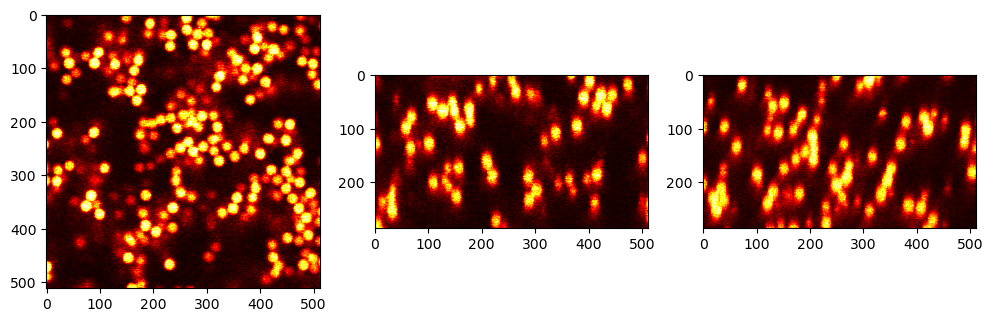

In [4]:
#imf = np.fromfile(r"C:\Users\Rony\Downloads\230223_bidisperse_gel_c_2.25.lif - 60minz1 - C=0.tif", dtype=np.uint8).reshape((287,512,512))
imf = io.imread(r"C:\Users\Rony\Downloads\230223_bidisperse_gel_c_2.25.lif - 60minz1 - C=0.tif")
print(np.shape(imf))
fig = plt.figure(figsize=(12,6))
plt.subplot(1,3,1).imshow(imf[30], 'hot',vmin=0,vmax=255);
plt.subplot(1,3,2).imshow(imf[:,25], 'hot',vmin=0,vmax=255);
plt.subplot(1,3,3).imshow(imf[:,:,30], 'hot',vmin=0,vmax=255);

In [5]:
finder = MultiscaleBlobFinder(imf.shape, Octave0=False, nbOctaves=4)

(1540, 5)
smallest particle detected has a radius of 4.45859 px


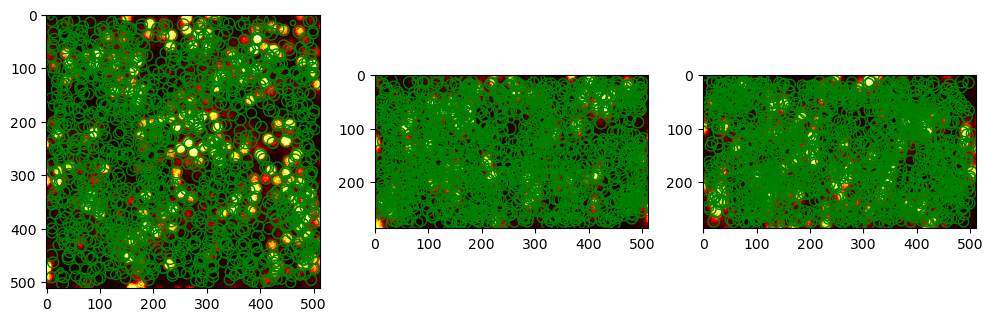

In [6]:
centers = finder(imf)
print(centers.shape)
print(f"smallest particle detected has a radius of {centers[:,-2].min():g} px")
fig = plt.figure(figsize=(12,6))
display_cuts(imf, centers)

(1631, 5)
smallest particle detected has a radius of 4.45859 px


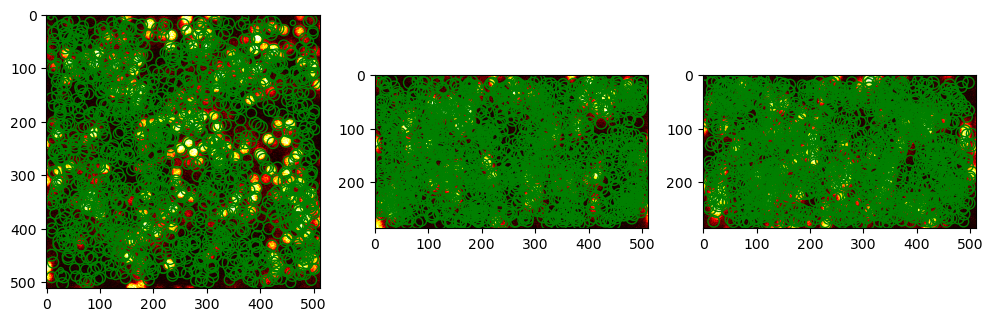

In [7]:
centers = finder(imf, removeOverlap=False)
print(centers.shape)
print(f"smallest particle detected has a radius of {centers[:,-2].min():g} px")
fig = plt.figure(figsize=(12,6))
display_cuts(imf, centers)